<a href="https://colab.research.google.com/github/ANGEL05122002/Mortalidad/blob/main/Mortalidad_en_M%C3%A9xico_COMPUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## La mortalidad, la fecundidad y la migración son fundamentales para comprender la dinámica del crecimiento de la población. La información que generan las EDR incluye la causa básica de las defunciones en México, así como las características del hecho y de las personas fallecidas. Lo anterior brinda elementos para analizar, diseñar, evaluar y dar seguimiento a las políticas de salud de la población.

## Las Estadísticas de Defunciones Registradas (EDR) permiten conocer y comparar el volumen, tendencias y características de la mortalidad en los diferentes ámbitos geográficos del país.

* El INEGI presenta información
proveniente del aprovechamiento de los registros administrativos generados por el Registro Civil, el Servicio
Médico Forense (SEMEFO) o sus equivalentes, así como por las Agencias del Ministerio Público o sus equivalentes en las entidades federativas.

* Integra también información generada por la Secretaría de Salud, que resulta del proceso de confronta entre la Secretaría de Salud y el INEGI, previo a la publicación de la información
definitiva.

La base de datos de este hecho vital tiene como objetivo ofrecer microdatos útiles y accesibles a estudiantes,
investigadores, autoridades y público en general, para atender las necesidades de información demográfica proveniente de los registros administrativos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
mortalidad = pd.read_csv('mortalidad.csv')
# Mostrar las primeras filas del dataset
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

# Información sobre las columnas del dataset
print(mortalidad.info())

| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | cod_adicio   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | maternas   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_

In [ ]:
#Eliminamos cod_adicio y maternas ya que presentan una gran cantidad de NA que interfieren con el Análisis
mortalidad = mortalidad.drop(['cod_adicio', 'maternas'], axis=1)
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_oax   |
|:------------|:----

In [ ]:
mortalidad.head(5)

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,15,1,32,44,5,1,1,1,...,19,9,18,12,2022,88,888,8888,0,999
1,1,1,15,1,1,1,15,1,1,1,...,20,9,12,12,2022,88,888,8888,0,999
2,1,1,15,1,1,1,15,1,1,1,...,18,9,17,12,2022,88,888,8888,0,999
3,1,1,15,1,1,1,15,1,1,1,...,23,9,1,1,2023,88,888,8888,0,999
4,1,1,15,1,14,53,1,7777,1,1,...,14,8,22,12,2022,88,888,8888,0,999


# Análisis Univariado

Estadísticas descriptivas de 'edad':
count    799869.000000
mean       4026.029610
std         316.509825
min        1001.000000
25%        4053.000000
50%        4069.000000
75%        4082.000000
max        4998.000000
Name: edad, dtype: float64


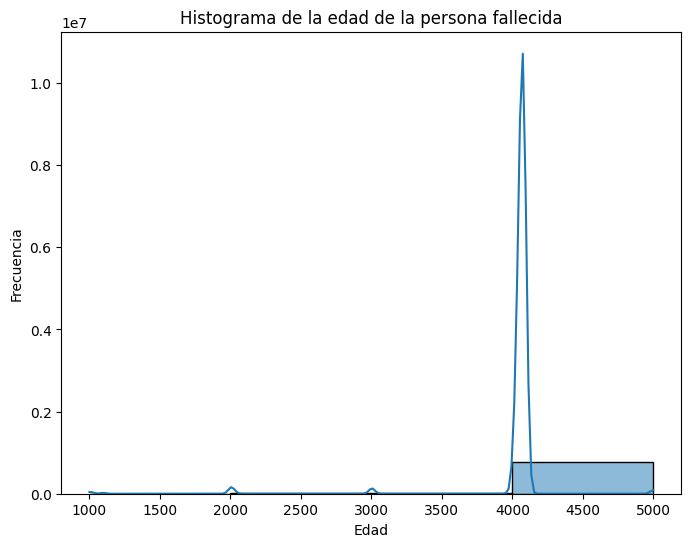

In [ ]:
# Análisis univariado de la variable 'edad'
print("Estadísticas descriptivas de 'edad':")
print(mortalidad['edad'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(mortalidad['edad'], bins=4, kde=True)
plt.title('Histograma de la edad de la persona fallecida')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## La variable "edad" en la base de datos no representa edades numéricas directamente, sino que usa códigos numéricos asociados a diferentes unidades de tiempo (horas, días, meses, años).

## Esto significa que debemos transformar estos valores en una escala coherente por ejemplo, convertir todo a años.

Estadísticas descriptivas de 'edad' (en años):
count    794321.000000
mean         64.524307
std          22.337086
min           0.000114
25%          53.000000
50%          69.000000
75%          81.000000
max         120.000000
Name: edad_transformada, dtype: float64


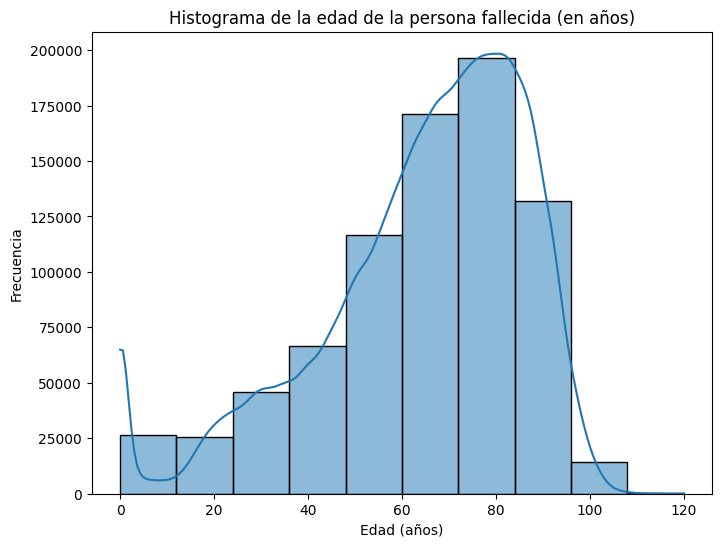

In [ ]:
# Función para convertir los valores de edad a años
def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760  # Convertir horas a años
    elif 2001 <= valor <= 2029:  # Días
        return (valor - 2000) / 365  # Convertir días a años
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12  # Convertir meses a años
    elif 4001 <= valor <= 4120:  # Años
        return valor - 4000  # Ya está en años
    else:
        return np.nan  # Si no está en los rangos, se asigna NaN

# Aplicar la conversión a la columna "edad"
mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Mostrar estadísticas descriptivas después de la transformación
print("Estadísticas descriptivas de 'edad' (en años):")
print(mortalidad['edad_transformada'].describe())

# Graficar el histograma
plt.figure(figsize=(8, 6))
sns.histplot(mortalidad['edad_transformada'].dropna(), bins=10, kde=True)
plt.title('Histograma de la edad de la persona fallecida (en años)')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# 1. Estadísticas descriptivas de la edad de las personas fallecidas
# Verificar los valores únicos en la columna 'sexo'
print("Valores únicos en la columna 'sexo':", mortalidad['sexo'].unique())

# Convertir la columna 'sexo' a string si es necesario
mortalidad['sexo'] = mortalidad['sexo'].astype(str)

# Filtrar datos por sexo
hombres = mortalidad[mortalidad['sexo'] == '1']
mujeres = mortalidad[mortalidad['sexo'] == '2']

# Calcular estadísticas descriptivas
estadisticas_generales = mortalidad[['edad_transformada']].describe()
estadisticas_hombres = hombres[['edad_transformada']].describe()
estadisticas_mujeres = mujeres[['edad_transformada']].describe()

# Mostrar estadísticas en formato Markdown para mejor visualización
print("📌 **Estadísticas generales de edad**")
print(estadisticas_generales.to_markdown(numalign="left", stralign="left"))

if not hombres.empty:
    print("\n🧑 **Estadísticas de edad para hombres**")
    print(estadisticas_hombres.to_markdown(numalign="left", stralign="left"))

if not mujeres.empty:
    print("\n👩 **Estadísticas de edad para mujeres**")
    print(estadisticas_mujeres.to_markdown(numalign="left", stralign="left"))

Valores únicos en la columna 'sexo': [2 1 9]
📌 **Estadísticas generales de edad**
|       | edad_transformada   |
|:------|:--------------------|
| count | 794321              |
| mean  | 64.5243             |
| std   | 22.3371             |
| min   | 0.000114155         |
| 25%   | 53                  |
| 50%   | 69                  |
| 75%   | 81                  |
| max   | 120                 |

🧑 **Estadísticas de edad para hombres**
|       | edad_transformada   |
|:------|:--------------------|
| count | 442484              |
| mean  | 61.1977             |
| std   | 22.4551             |
| min   | 0.000114155         |
| 25%   | 48                  |
| 50%   | 65                  |
| 75%   | 78                  |
| max   | 120                 |

👩 **Estadísticas de edad para mujeres**
|       | edad_transformada   |
|:------|:--------------------|
| count | 351742              |
| mean  | 68.7213             |
| std   | 21.4513             |
| min   | 0.000114155         |
| 25

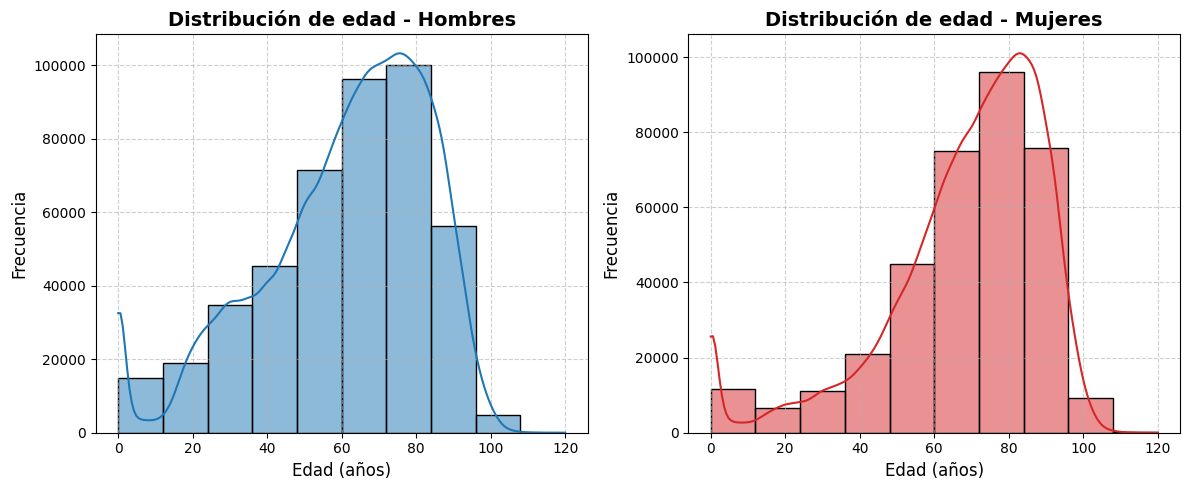

In [ ]:
color_hombres = "#1f77b4"
color_mujeres = "#d62728"

# Histogramas
plt.figure(figsize=(12, 5))

if not hombres.empty:
    plt.subplot(1, 2, 1)
    sns.histplot(hombres['edad_transformada'].dropna(), bins=10, kde=True, color=color_hombres)
    plt.title('Distribución de edad - Hombres', fontsize=14, fontweight='bold')
    plt.xlabel('Edad (años)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

if not mujeres.empty:
    plt.subplot(1, 2, 2)
    sns.histplot(mujeres['edad_transformada'].dropna(), bins=10, kde=True, color=color_mujeres)
    plt.title('Distribución de edad - Mujeres', fontsize=14, fontweight='bold')
    plt.xlabel('Edad (años)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()


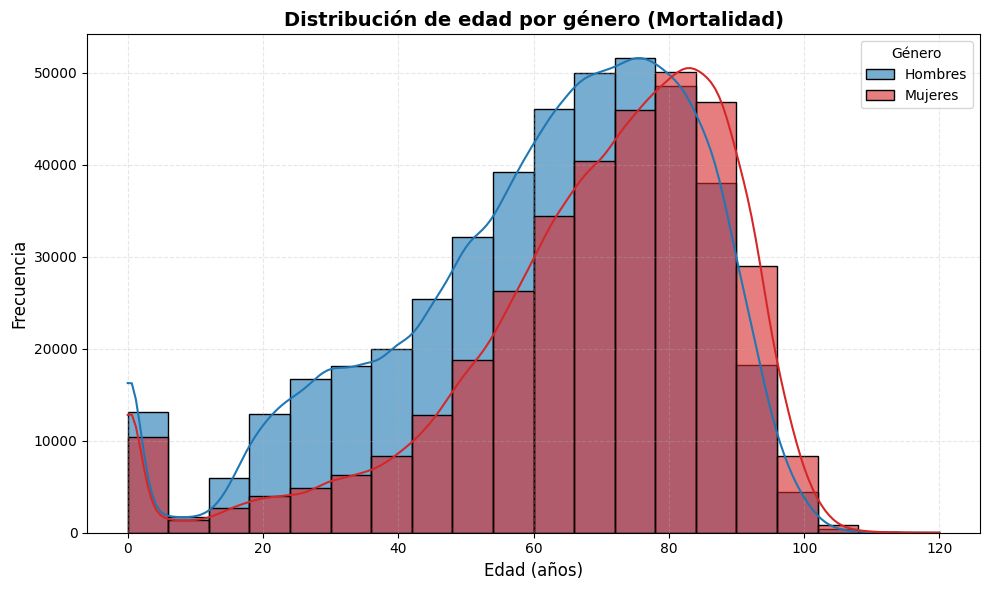

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma para hombres (azul)
sns.histplot(
    hombres['edad_transformada'],  # Ajusta 'edad' según tu CSV
    bins=20,
    color="#1f77b4",
    label='Hombres',
    alpha=0.6,
    kde=True,
)

# Histograma para mujeres (rojo)
sns.histplot(
    mujeres['edad_transformada'],  # Ajusta 'edad' según tu CSV
    bins=20,
    color="#d62728",
    label='Mujeres',
    alpha=0.6,
    kde=True,
)

plt.title('Distribución de edad por género (Mortalidad)', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Género')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

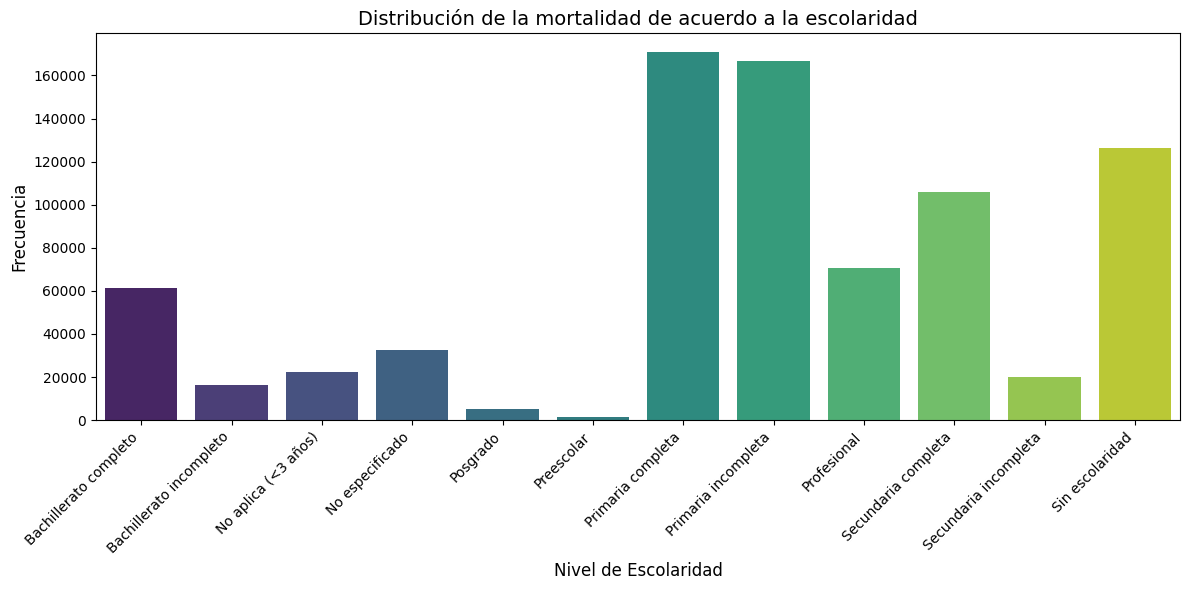

In [ ]:
# Diccionario con los valores y etiquetas de escolaridad
escolaridad_dict = {
    1: "Sin escolaridad", 2: "Preescolar", 3: "Primaria incompleta", 4: "Primaria completa",
    5: "Secundaria incompleta", 6: "Secundaria completa", 7: "Bachillerato incompleto",
    8: "Bachillerato completo", 9: "Profesional", 10: "Posgrado",
    88: "No aplica (<3 años)", 99: "No especificado"
}

# Contar la frecuencia de cada nivel de escolaridad
counts = mortalidad["escolarida"].value_counts().rename(index=escolaridad_dict).sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette="viridis",
    dodge=False,
    legend=False
)

# Etiquetas
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de la mortalidad de acuerdo a la escolaridad", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

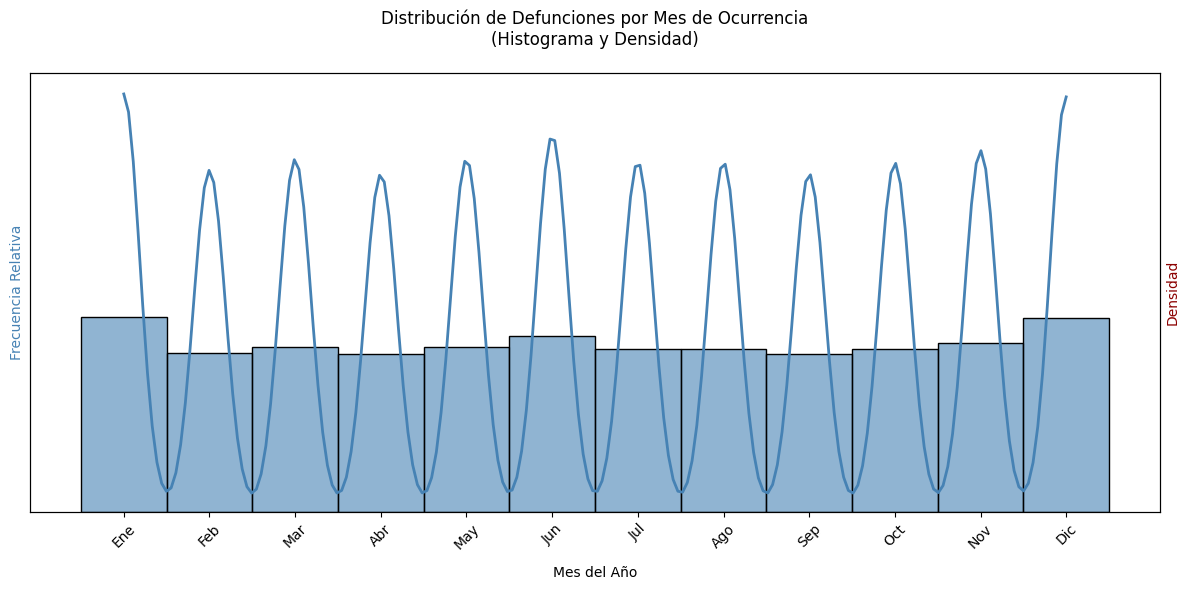

In [ ]:
# Filtrar datos (excluir 99 y valores nulos)
datos_filtrados = mortalidad[(mortalidad['mes_ocurr'] >= 1) &
                            (mortalidad['mes_ocurr'] <= 12)]['mes_ocurr'].dropna()

plt.figure(figsize=(12, 6))

ax = sns.histplot(datos_filtrados, bins=12, kde=True, discrete=True,
                 stat='density', alpha=0.6, color='steelblue',
                 kde_kws={'bw_adjust': 0.8},
                 line_kws={'linewidth': 2, 'color': 'darkred'})

# Ejes
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45)
plt.yticks([])

# Doble eje Y para mostrar densidad y conteo
ax2 = ax.twinx()
ax2.set_ylabel('Densidad', color='darkred')
ax2.set_yticks([])

# Títulos
plt.title('Distribución de Defunciones por Mes de Ocurrencia\n(Histograma y Densidad)', pad=20)
ax.set_xlabel('Mes del Año', labelpad=10)
ax.set_ylabel('Frecuencia Relativa', color='steelblue')

ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# Análisis Bivariado

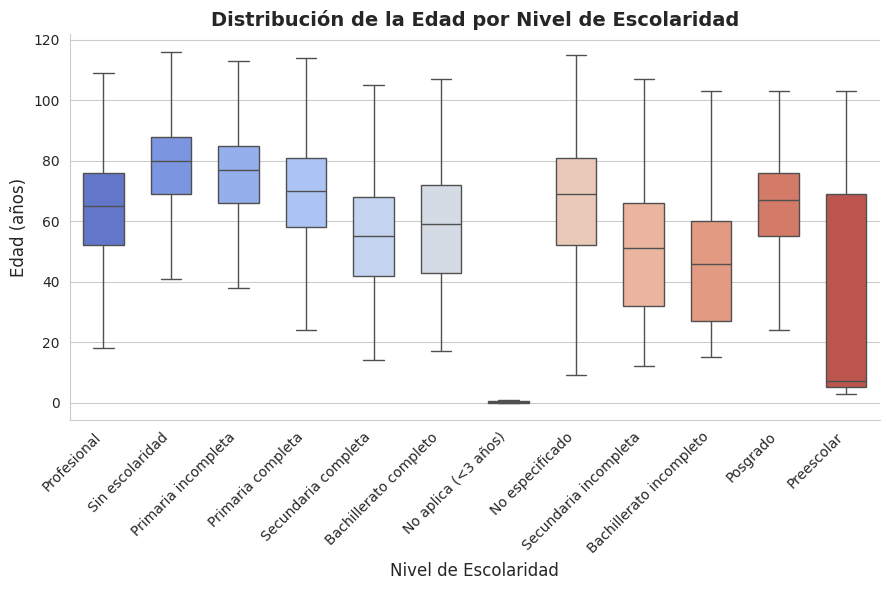

In [ ]:
# Diccionario
mortalidad["escolaridad_label"] = mortalidad["escolarida"].map(escolaridad_dict)

sns.set_style("whitegrid")
plt.figure(figsize=(9, 6))

# Gráfico de cajas
sns.boxplot(
    x="escolaridad_label",
    y="edad_transformada",
    data=mortalidad,
    hue="escolaridad_label",
    palette="coolwarm",
    showfliers=False,
    width=0.6,
    dodge=False,
    legend=False
)

plt.title("Distribución de la Edad por Nivel de Escolaridad", fontsize=14, fontweight="bold")
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Edad (años)", fontsize=12)
plt.xticks(rotation=45, ha="right")

sns.despine()
plt.tight_layout()
plt.show()

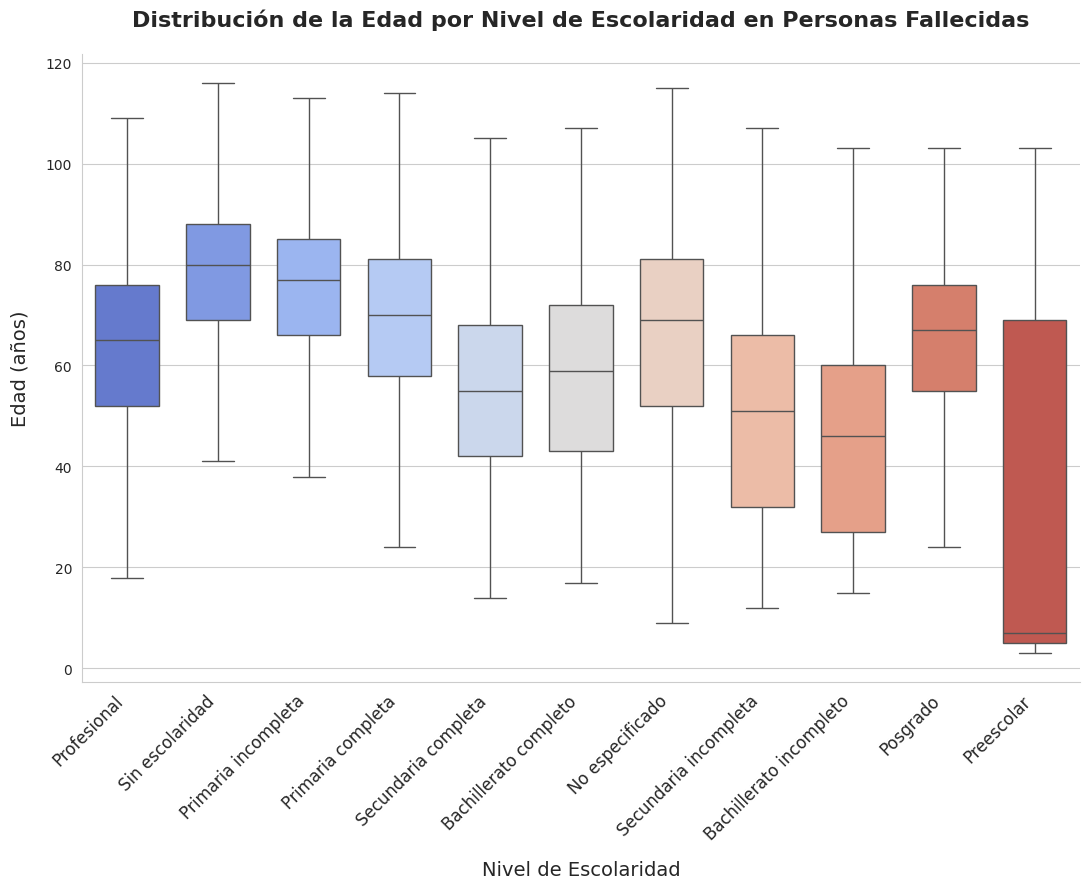

In [ ]:
mortalidad_filtrada = mortalidad[mortalidad["escolarida"] != 88]
mortalidad_filtrada = mortalidad_filtrada.assign(
    escolaridad_label=mortalidad_filtrada["escolarida"].map(escolaridad_dict)
)

sns.set_style("whitegrid")
plt.figure(figsize=(11, 9))


sns.boxplot(
    x="escolaridad_label",
    y="edad_transformada",
    data=mortalidad_filtrada,
    hue="escolaridad_label",
    palette="coolwarm",
    showfliers=False,
    width=0.7,
    dodge=False,
    legend=False
)

# Personalización del gráfico
plt.title("Distribución de la Edad por Nivel de Escolaridad en Personas Fallecidas",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Nivel de Escolaridad", fontsize=14, labelpad=12)
plt.ylabel("Edad (años)", fontsize=14, labelpad=12)
plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

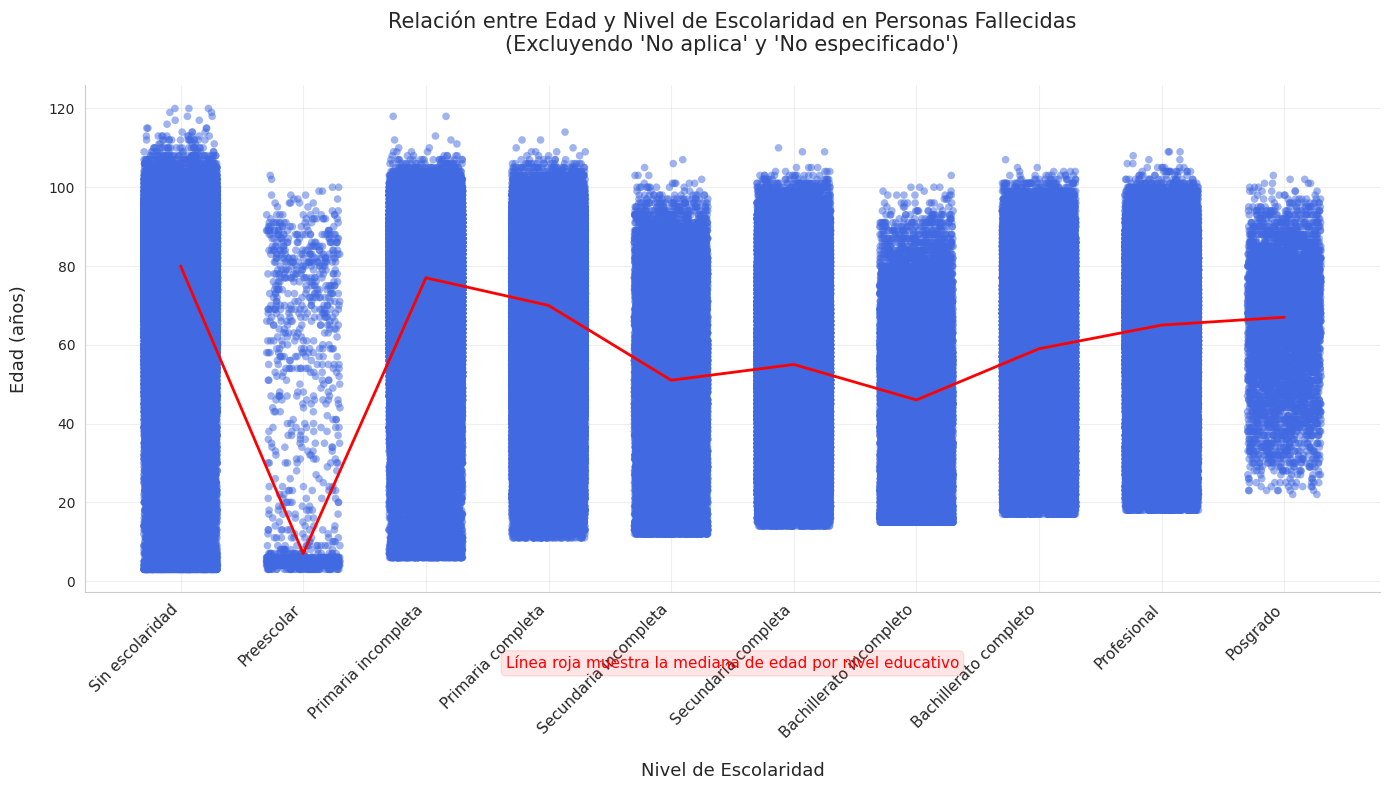

In [ ]:
# Filtrar la base de datos para excluir "No aplica (<3 años)" (88) y "No especificado" (99)
mortalidad_filtrada = mortalidad[~mortalidad["escolarida"].isin([88, 99])].assign(
    escolaridad_label=lambda x: x["escolarida"].map(escolaridad_dict),
    jittered_x=lambda x: x["escolarida"] + np.random.uniform(-0.3, 0.3, size=len(x))
)

sns.set_style("whitegrid")
plt.figure(figsize=(11, 8))  # Tamaño aumentado para mejor visualización

# Scatter plot
scatter = sns.scatterplot(
    x="jittered_x",
    y="edad_transformada",
    data=mortalidad_filtrada,
    color="royalblue",
    alpha=0.5,
    s=30,
    edgecolor="none"
)

# Etiquetas del eje X
niveles_escolaridad = sorted(mortalidad_filtrada["escolarida"].unique())
plt.xticks(
    ticks=niveles_escolaridad,
    labels=[escolaridad_dict[i] for i in niveles_escolaridad],
    rotation=45,
    ha="right",
    fontsize=11
)

plt.title("Relación entre Edad y Nivel de Escolaridad en Personas Fallecidas\n(Excluyendo 'No aplica' y 'No especificado')",
          fontsize=15, pad=25)
plt.xlabel("Nivel de Escolaridad", fontsize=13, labelpad=15)
plt.ylabel("Edad (años)", fontsize=13, labelpad=15)

# Línea de mediana por nivel educativo (sin CI)
sns.lineplot(
    x="escolarida",
    y="edad_transformada",
    data=mortalidad_filtrada,
    color="red",
    errorbar=None,
    estimator=np.median,
    linewidth=2,
    ax=scatter
)

plt.annotate("Línea roja muestra la mediana de edad por nivel educativo",
             xy=(0.5, -0.15),
             xycoords="axes fraction",
             ha="center",
             fontsize=11,
             color="red",
             bbox=dict(boxstyle="round", alpha=0.1, color="red"))

plt.grid(True, alpha=0.3)
plt.tight_layout()
sns.despine()

plt.show()

In [ ]:
# Función para calcular Cramer's V
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    tabla_contingencia = pd.crosstab(x, y)  # Tabla de contingencia
    if tabla_contingencia.empty:  # Verificar si hay datos
        return np.nan
    chi2 = chi2_contingency(tabla_contingencia)[0]  # Chi-cuadrado
    n = tabla_contingencia.sum().sum()  # Total de observaciones
    k = min(tabla_contingencia.shape) - 1  # Mínimo entre filas y columnas menos 1
    return np.sqrt(chi2 / (n * k))  # Fórmula de Cramer’s V

# Asegurar que 'sexo' sea numérico
mortalidad["sexo"] = pd.to_numeric(mortalidad["sexo"], errors="coerce")

# Verificar si hay datos en la base
print("Valores únicos en 'sexo':", mortalidad["sexo"].unique())

# Filtrar por sexo y eliminar filas con NaN en 'lugar_ocur' o 'tipo_defun'
df_hombres = mortalidad[(mortalidad["sexo"] == 1) & mortalidad["lugar_ocur"].notna() & mortalidad["tipo_defun"].notna()]
df_mujeres = mortalidad[(mortalidad["sexo"] == 2) & mortalidad["lugar_ocur"].notna() & mortalidad["tipo_defun"].notna()]

# Calcular Cramer's V solo si hay datos suficientes
if not df_hombres.empty:
    cramers_hombres = cramers_v(df_hombres["lugar_ocur"], df_hombres["tipo_defun"])
else:
    cramers_hombres = "No hay datos suficientes"

if not df_mujeres.empty:
    cramers_mujeres = cramers_v(df_mujeres["lugar_ocur"], df_mujeres["tipo_defun"])
else:
    cramers_mujeres = "No hay datos suficientes"

# Resultados
print(f"Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en HOMBRES: {cramers_hombres}")
print(f"Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en MUJERES: {cramers_mujeres}")

Valores únicos en 'sexo': [2 1 9]
Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en HOMBRES: 0.5006285988761413
Asociación (Cramer’s V) entre lugar de ocurrencia y tipo de defunción en MUJERES: 0.5584825116022842


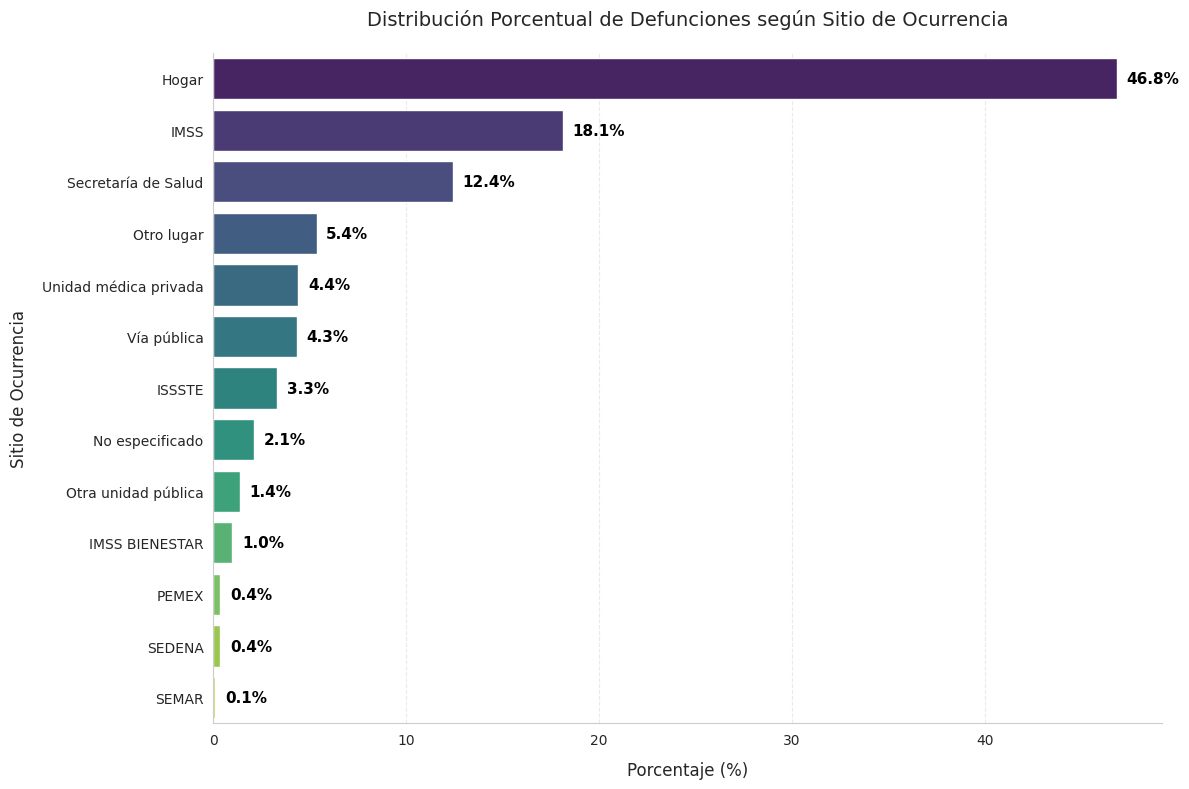

In [ ]:
## EJERCICIO PRACTICO
# Distribución Porcentual de Defunciones según Sitio de Ocurrencia

# Diccionario con los valores y etiquetas del sitio de ocurrencia
sitio_ocurrencia_dict = {
    1: "Secretaría de Salud", 2: "IMSS BIENESTAR", 3: "IMSS", 4: "ISSSTE",
    5: "PEMEX", 6: "SEDENA", 7: "SEMAR", 8: "Otra unidad pública",
    9: "Unidad médica privada", 10: "Vía pública", 11: "Hogar",
    12: "Otro lugar", 99: "No especificado"
}

mortalidad["Sitio_ocur_label"] = mortalidad["sitio_ocur"].map(sitio_ocurrencia_dict)
# Distribución porcentual
porcentaje = (mortalidad["Sitio_ocur_label"].value_counts(normalize=True) * 100).sort_values(ascending=False)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras corregido
sns.barplot(
    x=porcentaje.values,
    y=porcentaje.index,
    hue=porcentaje.index,
    palette="viridis",
    dodge=False,
    legend=False
)

# Etiquetas
plt.xlabel("Porcentaje (%)", fontsize=12, labelpad=10)
plt.ylabel("Sitio de Ocurrencia", fontsize=12, labelpad=10)
plt.title("Distribución Porcentual de Defunciones según Sitio de Ocurrencia",
          fontsize=14, pad=20)

for index, value in enumerate(porcentaje.values):
    plt.text(
        value + 0.5,
        index,
        f"{value:.1f}%",
        va="center",
        fontsize=11,
        fontweight="bold",
        color="black"
    )


sns.despine()
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Ajustar márgenes
plt.tight_layout()
plt.show()

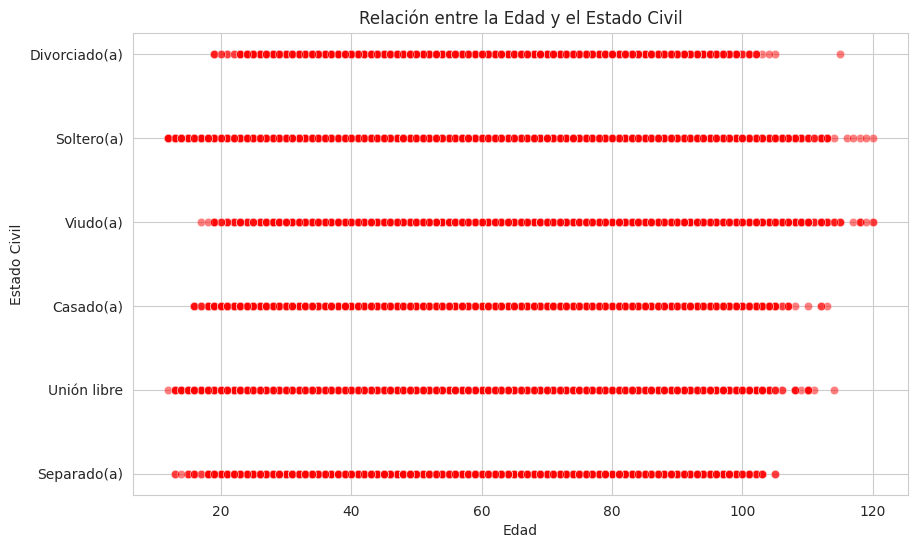

In [ ]:
# Análisis bivariado: Edad vs. causa_def
# Diccionario de estado civil
edo_civil_dict = {1: "Soltero(a)", 2: "Divorciado(a)", 3: "Viudo(a)",
    4: "Unión libre", 5: "Casado(a)", 6: "Separado(a)"}

# Filtrar solo los valores 1 a 6 en edo_civil
mortalidad_filtrada = mortalidad[mortalidad["edo_civil"].isin(edo_civil_dict.keys())].copy()

mortalidad_filtrada["edo_civil_label"] = mortalidad_filtrada["edo_civil"].map(edo_civil_dict)

# Gráfico de dispersión entre edad y estado civil (solo valores 1-6)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad_transformada', y='edo_civil_label', data=mortalidad_filtrada, color='red', alpha=0.5)

# Etiquetas
plt.title('Relación entre la Edad y el Estado Civil')
plt.xlabel('Edad')
plt.ylabel('Estado Civil')

plt.show()

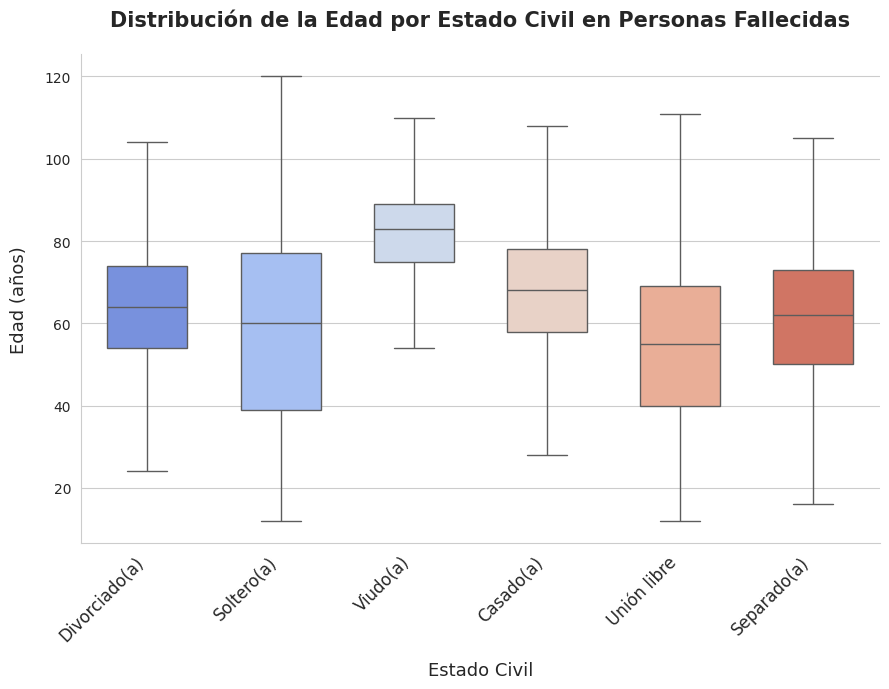

In [ ]:
# Estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(9, 7))  # Aumenté ligeramente la altura

# Diccionario de estado civil
edo_civil_dict = {1: "Soltero(a)", 2: "Divorciado(a)", 3: "Viudo(a)",
    4: "Unión libre", 5: "Casado(a)", 6: "Separado(a)"}

# Filtrar solo los valores 1 a 6 en edo_civil and add the 'edo_civil_label' column
mortalidad_filtrada = mortalidad[mortalidad["edo_civil"].isin(edo_civil_dict.keys())].copy()
mortalidad_filtrada["edo_civil_label"] = mortalidad_filtrada["edo_civil"].map(edo_civil_dict)

# Crear el boxplot corregido
sns.boxplot(
    x="edo_civil_label",
    y="edad_transformada",
    data=mortalidad_filtrada,
    hue="edo_civil_label",
    palette="coolwarm",
    showfliers=False,
    width=0.6,
    dodge=False,
    legend=False
)

# Etiquetas
plt.title(
    "Distribución de la Edad por Estado Civil en Personas Fallecidas",
    fontsize=15,
    fontweight="bold",
    pad=20
)
plt.xlabel("Estado Civil", fontsize=13, labelpad=12)
plt.ylabel("Edad (años)", fontsize=13, labelpad=12)
plt.xticks(
    rotation=45,
    ha="right",
    fontsize=12
)

sns.despine()
plt.tight_layout()
plt.show()

La correlación entre la edad y el estado civil es de: 0.12


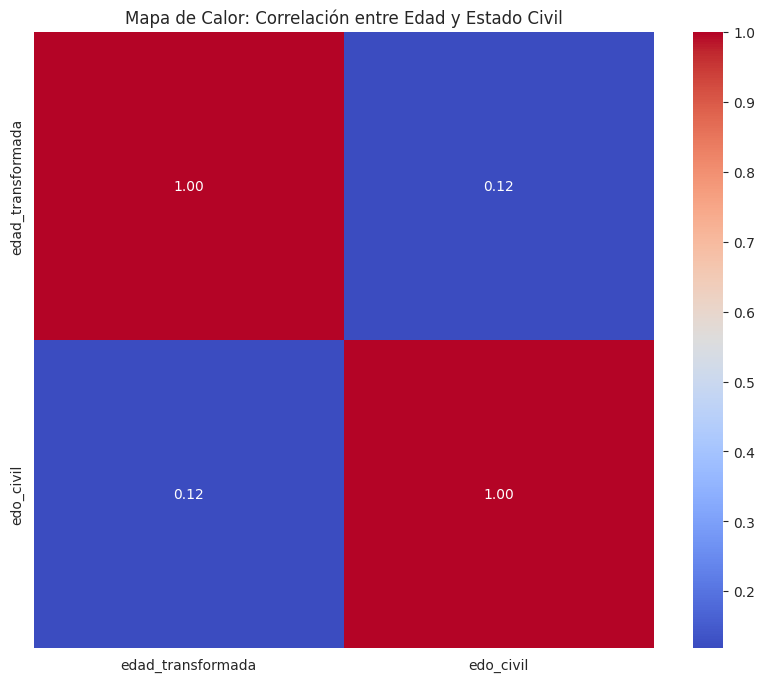

In [ ]:
# Calcular la correlación entre edad y estado civil
correlation_value = mortalidad_filtrada['edad_transformada'].corr(mortalidad_filtrada['edo_civil'])
print(f"La correlación entre la edad y el estado civil es de: {correlation_value:.2f}")

# Mapa de calor de la correlación entre edad y estado civil
plt.figure(figsize=(10, 8))
sns.heatmap(mortalidad_filtrada[['edad_transformada', 'edo_civil']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor: Correlación entre Edad y Estado Civil')
plt.show()

## Análisis Multivariado

Matriz de Correlación (Cramer's V):
            edo_civil  tipo_defun  lugar_ocur  mun_regis  tloc_regis  \
edo_civil    1.000000    0.106825    0.087943   0.130733    0.050219   
tipo_defun   0.106825    1.000000    0.499428   0.164830    0.096534   
lugar_ocur   0.087943    0.499428    1.000000   0.115545    0.065930   
mun_regis    0.130733    0.164830    0.115545   1.000000    0.548253   
tloc_regis   0.050219    0.096534    0.065930   0.548253    1.000000   
loc_regis    0.067674    0.129866    0.086460   0.121005    0.270581   
ent_resid    0.202728    0.114935    0.075227   0.494291    0.294286   
mun_resid    0.152106    0.099582    0.066132   0.738655    0.386905   
tloc_resid   0.115812    0.090171    0.059954   0.320213    0.513051   
loc_resid    0.120186    0.087505    0.061482   0.048001    0.154987   
ent_ocurr    0.166532    0.092465    0.059029   0.531803    0.313476   

            loc_regis  ent_resid  mun_resid  tloc_resid  loc_resid  ent_ocurr  
edo_civil    0.0676

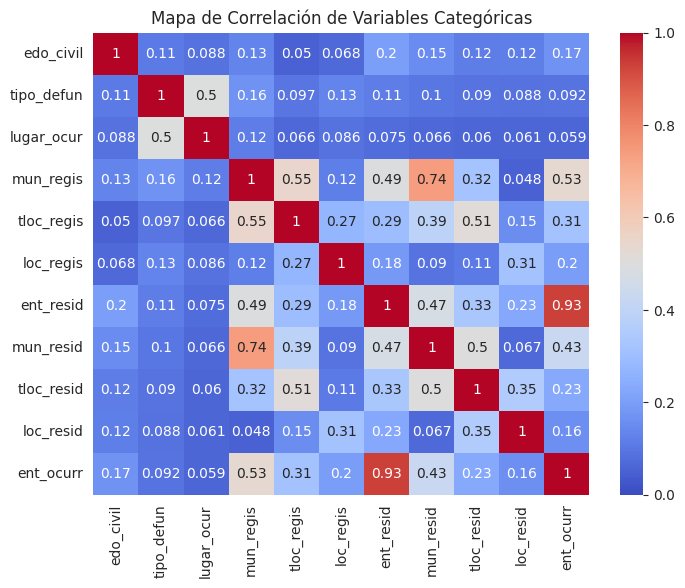

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular el Coeficiente de Correlación de Cramer's V
def cramers_v(x, y):
    # Crear una tabla de contingencia
    confusion_matrix = pd.crosstab(x, y)

    # Calcular el estadístico chi-cuadrado
    chi2 = chi2_contingency(confusion_matrix)[0]

    # Calcular el tamaño total de la muestra
    n = confusion_matrix.sum().sum()

    # Calcular phi2 (correlación basada en chi-cuadrado)
    phi2 = chi2 / n

    # Calcular el número de filas y columnas
    r, k = confusion_matrix.shape

    # Ajustar phi2 para Cramer's V
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    # Calcular Cramer's V
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Seleccionar las columnas de interés (Aqui fue a criterio propio)
columnas_interes = ['edo_civil', 'tipo_defun', 'lugar_ocur',"mun_regis",	"tloc_regis",	"loc_regis",	"ent_resid",	"mun_resid"	,"tloc_resid",	"loc_resid",	"ent_ocurr"]
df = mortalidad[columnas_interes]

# Crear una matriz de correlación vacía
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calcular Cramer's V para cada par de variables
for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir la matriz a valores numéricos
corr_matrix = corr_matrix.astype(float)

# Mostrar la matriz de correlación
print("Matriz de Correlación (Cramer's V):")
print(corr_matrix)

# Creacion de un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Mapa de Correlación de Variables Categóricas")
plt.show()

##  Análisis de Componentes Principales (PCA) (Opcional)
El PCA es útil para reducir la dimensionalidad de los datos, especialmente cuando tienes muchas variables correlacionadas. Esto te permitirá visualizar y analizar los datos en un espacio de menor dimensión.

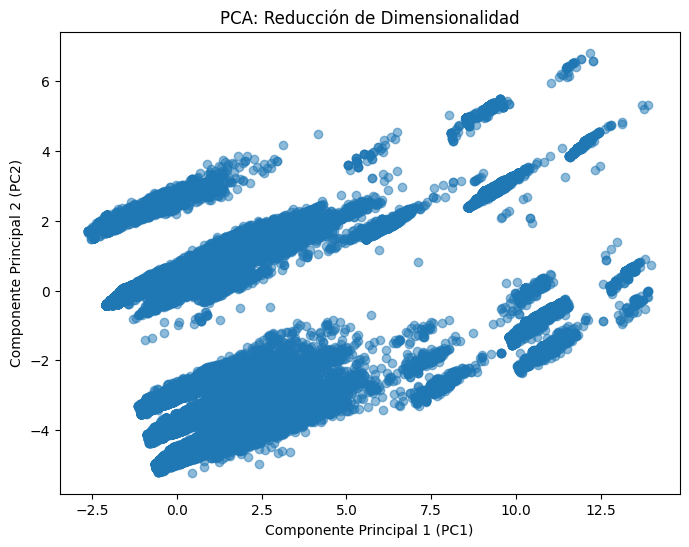

Varianza explicada por cada componente: [0.26983029 0.19719666]


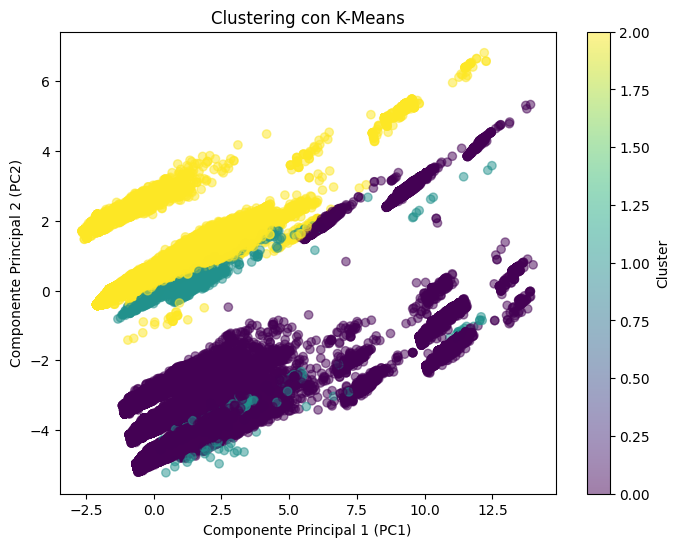

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Seleccionamos las columnas de interés
columnas_interes = ['edo_civil', 'tipo_defun', 'lugar_ocur', 'mun_regis',
                    'loc_regis', 'ent_resid', 'mun_resid', 'loc_resid', 'ent_ocurr']
df = mortalidad[columnas_interes]

# Escalar los datos (PCA y clustering requieren datos estandarizados)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Aquí se define df_scaled

# --- Análisis de Componentes Principales (PCA) ---
# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_result = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title("PCA: Reducción de Dimensionalidad")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.show()

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

#  Clustering con K-Means
# Aplicar K-Means a los datos escalados
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters
df_pca['Cluster'] = kmeans.fit_predict(df_scaled)  # Usar df_scaled para clustering

# Visualizar los clusters en el espacio de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Clustering con K-Means")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()

#  Clustering Jerárquico
# Calcular la matriz de enlace
Z = linkage(df_scaled, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title("Dendrograma: Clustering Jerárquico")
plt.xlabel("Índice de la Muestra")
plt.ylabel("Distancia")
plt.show()

* PCA reduce las variables originales a un número menor de componentes principales

* StandardScaler estandariza los datos para que tengan media 0 y desviación estándar 1, lo cual es necesario para PCA.

* pca.explained_variance_ratio_ te dice cuánta varianza de los datos originales es capturada por cada componente principal.

El clustering es útil para identificar grupos naturales en los datos. Usando algoritmos como K-Means o Agrupamiento Jerárquico.

* K-Means agrupa los datos en un número específico de clusters (en este caso,3).

* Los resultados del clustering se visualizan en el espacio de PCA para interpretar los grupos.

#  Modelo de Regresión Polinomica para el Análisis de las Tendencias y Causas de la Mortalidad en México del 2023

### ¿Por qué usamos diferentes grados en la regresión polinómica?

La regresión polinómica nos permite modelar relaciones no lineales entre la edad y el número de defunciones. El **grado del polinomio** define la flexibilidad del modelo:

| Grado del polinomio | Qué captura | Riesgo |
|--------------------|-------------|--------|
| **Grado 2 (cuadrático)** | Patrón en forma de U o arco (una sola curvatura) | Puede ser demasiado simple y no seguir bien los datos si el patrón es más complejo. |
| **Grado 3 (cúbico)** | Permite hasta dos puntos de inflexión (cambio de curvatura) | Ajusta mejor, pero podría empezar a seguir el ruido. |
| **Grado 4 (cuártico)** | Permite formas más onduladas y complejas | Mayor riesgo de sobreajuste: el modelo se adapta demasiado a las fluctuaciones y pierde capacidad de generalización. |

**¿Por qué probar varios grados?**

- Para encontrar un equilibrio entre simplicidad y buen ajuste a los datos.
- Porque la mortalidad suele tener un patrón complejo: alta en edades muy tempranas y avanzadas, y baja en edades intermedias.
- Para evaluar el modelo con métricas como R² y validación cruzada, y no solo por la apariencia del gráfico.

Probar distintos grados nos ayuda a elegir el modelo que mejor describe la realidad sin sobreajustarse.



--- Polinomio grado 2 ---
R²: 0.676
MSE: 9475303.786
MSE validación cruzada: 137740288.146
Shapiro-Wilk residuos: stat=0.934, p-valor=0.000


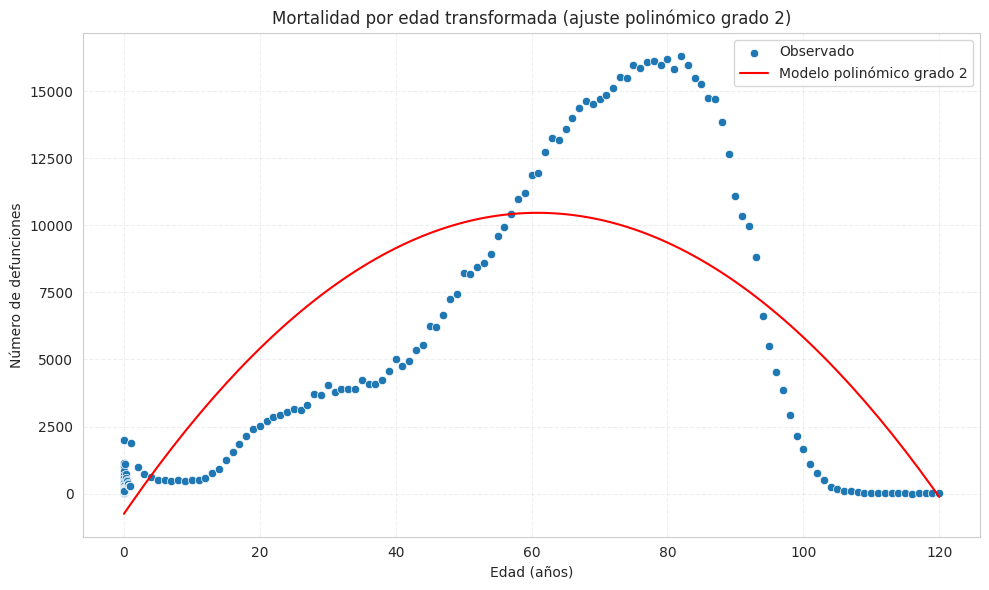


--- Polinomio grado 3 ---
R²: 0.850
MSE: 4401267.258
MSE validación cruzada: 64736952.048
Shapiro-Wilk residuos: stat=0.913, p-valor=0.000


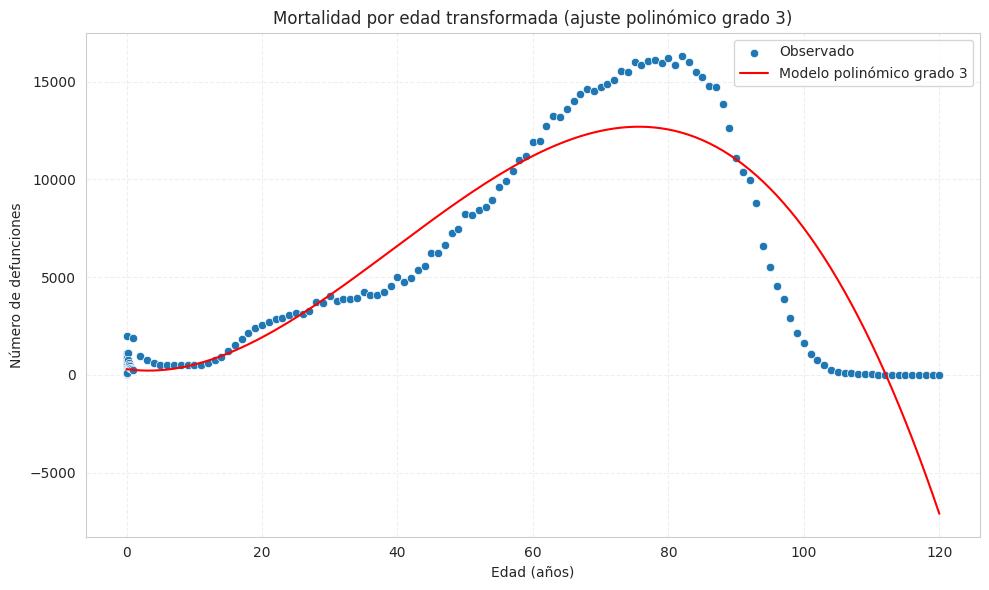


--- Polinomio grado 4 ---
R²: 0.875
MSE: 3646296.945
MSE validación cruzada: 40330992.688
Shapiro-Wilk residuos: stat=0.977, p-valor=0.004


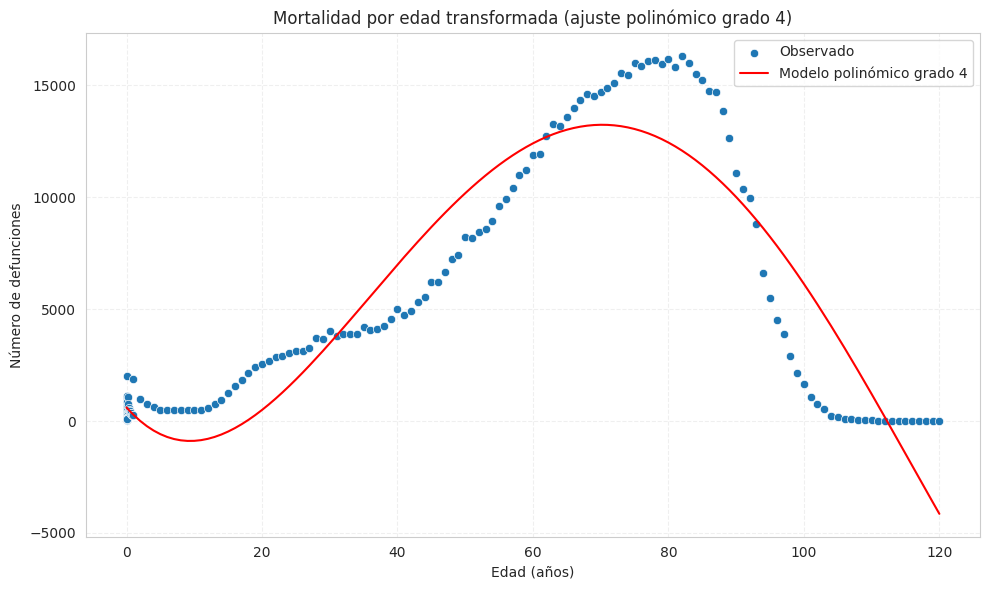

In [ ]:
#############  USANDO EDAD EN AÑOS   ################
def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760
    elif 2001 <= valor <= 2029:  # Días
        return (valor - 2000) / 365
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12
    elif 4001 <= valor <= 4120:  # Años
        return valor - 4000
    else:
        return np.nan

mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Eliminamos registros sin edad válida
mortalidad_valid = mortalidad[(~mortalidad['edad_transformada'].isna()) & (mortalidad['anio_ocur'] == 2023)]

# Agrupamos los datos
df_simple = (
    mortalidad_valid
    .groupby('edad_transformada')
    .size()
    .reset_index(name='defunciones')
    .sort_values('edad_transformada')
)

def ajustar_y_graficar(df, grado):
    X = df[['edad_transformada']]
    y = df['defunciones']

    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Validación
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
    residuos = y - y_pred
    stat, p_shapiro = shapiro(residuos)

    # Métricas
    print(f"\n--- Polinomio grado {grado} ---")
    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"MSE validación cruzada: {mse_cv:.3f}")
    print(f"Shapiro-Wilk residuos: stat={stat:.3f}, p-valor={p_shapiro:.3f}")


    plt.figure(figsize=(10,6))
    sns.scatterplot(x='edad_transformada', y='defunciones', data=df, label='Observado')
    sns.lineplot(x=df['edad_transformada'], y=y_pred, color='red', label=f'Modelo polinómico grado {grado}')
    plt.title(f'Mortalidad por edad transformada (ajuste polinómico grado {grado})')
    plt.xlabel('Edad (años)')
    plt.ylabel('Número de defunciones')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# MODELOS
for grado in [2, 3, 4]:
    ajustar_y_graficar(df_simple, grado)



--- Polinomio grado 2 ---
R²: 0.483
MSE: 397572424.004
MSE validación cruzada: 2686775679.984
Shapiro-Wilk residuos: stat=0.877, p-valor=0.002


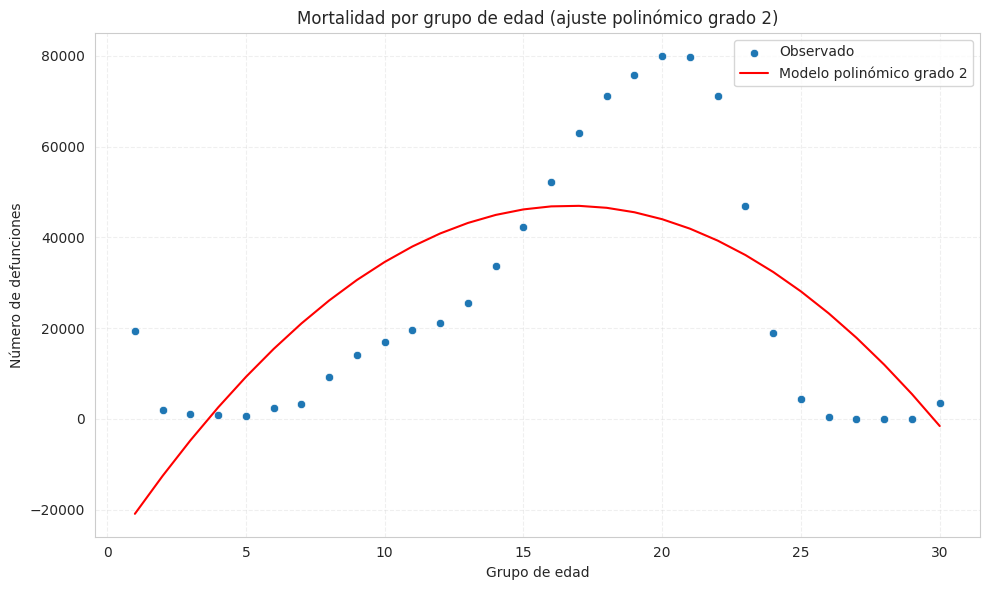


--- Polinomio grado 3 ---
R²: 0.700
MSE: 230764260.217
MSE validación cruzada: 1897566222.410
Shapiro-Wilk residuos: stat=0.948, p-valor=0.146


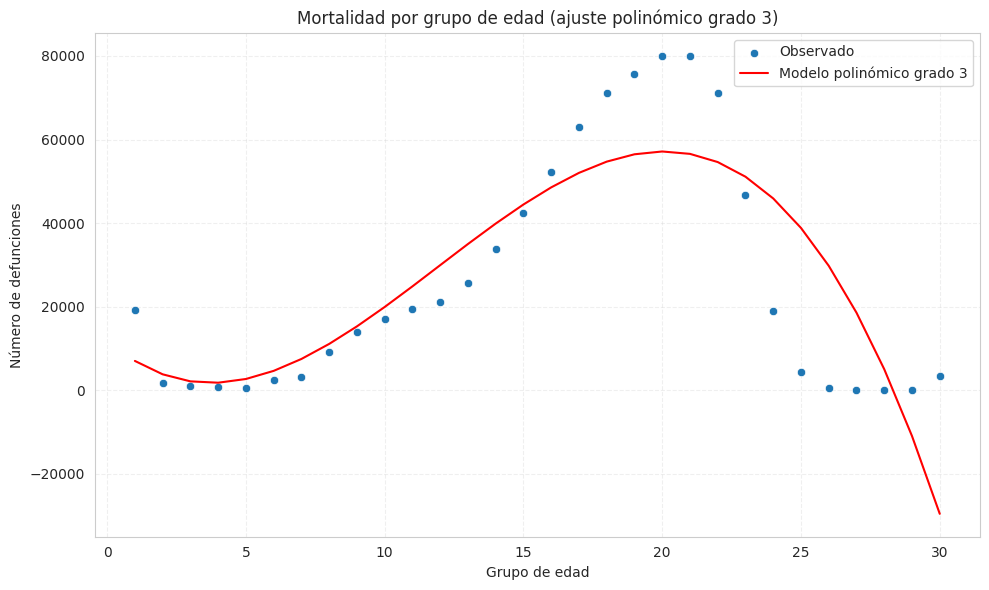


--- Polinomio grado 4 ---
R²: 0.799
MSE: 154554713.741
MSE validación cruzada: 18368968726.016
Shapiro-Wilk residuos: stat=0.976, p-valor=0.698


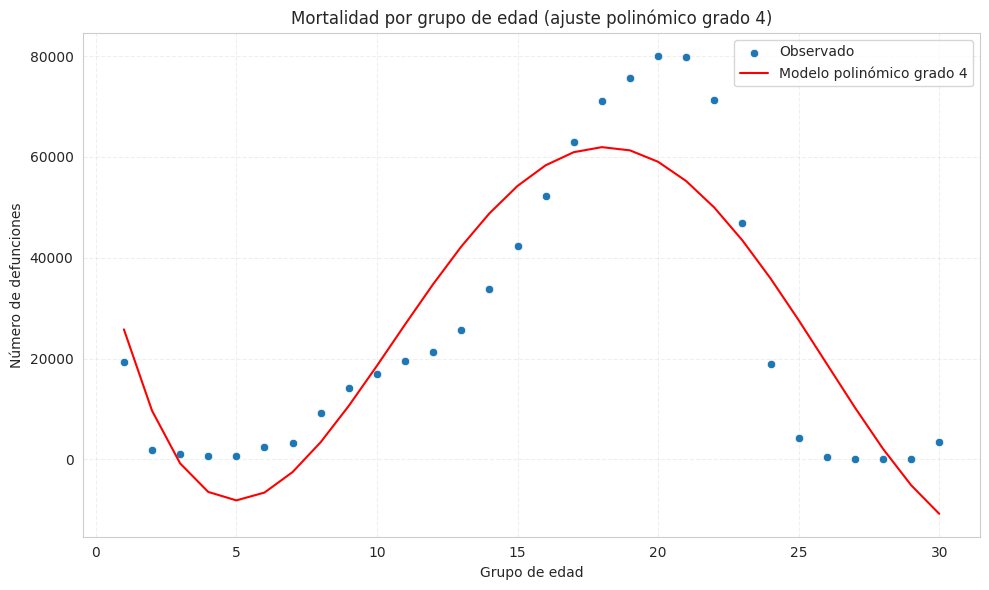

In [ ]:
#############  USANDO EDAD_AGRU (opcional)   ################


# Contar defunciones totales por grupo de edad
df_simple = (
    mortalidad[mortalidad['anio_ocur'] == 2023]
    .groupby('edad_agru')
    .size()
    .reset_index(name='defunciones')
    .sort_values('edad_agru')
)

def ajustar_y_graficar(df, grado):
    X = df[['edad_agru']]
    y = df['defunciones']

    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Validación
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
    residuos = y - y_pred
    stat, p_shapiro = shapiro(residuos)

    # Métricas
    print(f"\n--- Polinomio grado {grado} ---")
    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"MSE validación cruzada: {mse_cv:.3f}")
    print(f"Shapiro-Wilk residuos: stat={stat:.3f}, p-valor={p_shapiro:.3f}")

    # Graficar
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='edad_agru', y='defunciones', data=df, label='Observado')
    sns.lineplot(x=df['edad_agru'], y=y_pred, color='red', label=f'Modelo polinómico grado {grado}')
    plt.title(f'Mortalidad por grupo de edad (ajuste polinómico grado {grado})')
    plt.xlabel('Grupo de edad')
    plt.ylabel('Número de defunciones')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

#  MODELOS
for grado in [2, 3, 4]:
    ajustar_y_graficar(df_simple, grado)
